<a href="https://colab.research.google.com/github/vansh536/Dijkstra_delhi-metro-path-finder/blob/master/Ideal_low_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [19]:
# Step 3: Load an Image
image = cv2.imread('/content/flower.jpeg',0)

In [20]:
# Load the image in grayscale

# Step 4: Convert to Frequency Domain
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [22]:
# Step 5: Create the Ideal Low-Pass Filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30  # radius of the ideal low-pass filter
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) * 2 + (y - center[1]) * 2 <= r*r
mask[mask_area] = 1

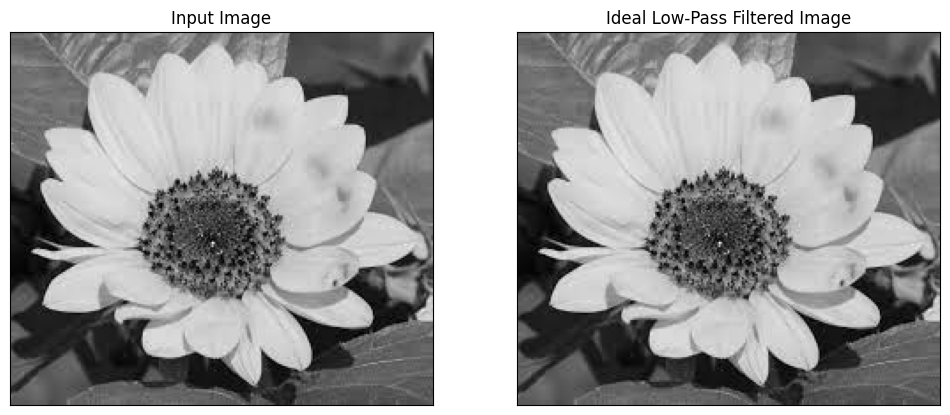

In [23]:
# Step 6: Apply the Filter
fshift = dft_shift * mask

# Step 7: Inverse Transform
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Step 8: Display the Results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Ideal Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()